# Light Curve of a Cepheid Variable Star


Data Source:
http://www.mso.anu.edu.au/~jerjen/researchprojects/cepheids/cepheids.html



In [1]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.visualization import astropy_mpl_style, simple_norm

%matplotlib inline

In [2]:

plot_data = pd.DataFrame(columns = ['date','aperture_1','aperture_2'])
files = glob.glob('E:\\Cepheid Variables Project\\cepheid-variables-main\\cepheid-variables-main\\data\\fits files\\*.fits')


In [3]:
for file in files:
    hdu = fits.open(file)
    header = hdu[0].header

In [4]:
image = hdu[0].data
positions = [(101.,101.),(103.5,172.5)]
aperture = CircularAperture(positions,r=3.)
phot_table = aperture_photometry(image, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  
print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   101.0   101.0    71822.702
  2   103.5   172.5    116090.08


In [5]:
def get_img(self): 
    hdul = fits.open(self)
    image = np.asarray(hdul[0].data)
    hdul.close() 
    return image

In [6]:
def imgshow(image): #display the image
    plt.figure(figsize=(8,8)) #size
    plt.style.use(astropy_mpl_style) 
    plt.imshow(image,vmin=np.median(image)-1*np.std(image),
               vmax=np.median(image)+10*np.std(image),cmap='gray')

    plt.colorbar() 
    plt.show()
    plt.close()

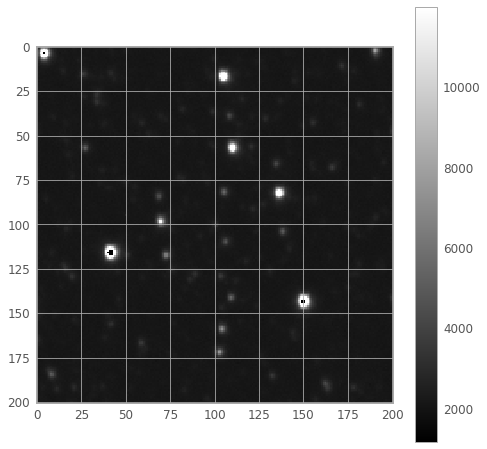

In [7]:
imgshow(hdu[0].data)

In [8]:
#radii = [3., 5., 10.]
#>>> apertures = [CircularAperture(positions, r=r) for r in radii]
#>>> phot_table = aperture_photometry(data, apertures)
#>>> for col in phot_table.colnames:
#...     phot_table[col].info.format = '%.8g'  
#>>> print(phot_table)

circular_annulus = CircularAnnulus(positions, r_in=6, r_out=8)
apers = [aperture, circular_annulus]
annulus_aperture = aperture_photometry(image, apers)
phot_table = aperture_photometry(image, apers)
phot_table['aperture_sum_1'].info.format = '%.8g'  
print(phot_table)

 id xcenter ycenter   aperture_sum_0   aperture_sum_1
      pix     pix                                    
--- ------- ------- ------------------ --------------
  1   101.0   101.0  71822.70226045945      194280.63
  2   103.5   172.5 116090.07997936328      190990.21


In [9]:
#background_mean = phot_table['aperture_sum_1']/annulus_aperture.area
#bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

In [10]:
annulus_aperture = CircularAnnulus(positions, r_in=6, r_out=8)
phot_table = aperture_photometry(image, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  

apers = [aperture, circular_annulus]
phot_table = aperture_photometry(image, apers)
phot_table['aperture_sum_1'].info.format = '%.8g'  
print(phot_table)

 id xcenter ycenter   aperture_sum_0   aperture_sum_1
      pix     pix                                    
--- ------- ------- ------------------ --------------
  1   101.0   101.0  71822.70226045945      194280.63
  2   103.5   172.5 116090.07997936328      190990.21


In [11]:
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

In [12]:
bkg_sum = bkg_mean * aperture.area
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table['residual_aperture_sum'].info.format = '%.8g'
phot_table['bkg_sum'] = bkg_sum
print(phot_table['residual_aperture_sum'])

residual_aperture_sum
---------------------
            9375.3554
             54700.37


In [13]:
aperture1 = phot_table['residual_aperture_sum'][0]
aperture2 = phot_table['residual_aperture_sum'][1]
#aperture3 = phot_table['residual_aperture_sum'][2]

In [21]:
import julian
import datetime
jd = float(file[-18:-5])
date = julian.from_jd(jd, fmt = 'jd')
plot_data = plot_data.append({'date':date, 'aperture_1':aperture1,'aperture_2':aperture2},ignore_index=True)
plot_data

,date,aperture_1,aperture_2
0,2000-12-12 06:28:41.087989,9375.355438,54700.369782


In [17]:
#pip install julian

Note: you may need to restart the kernel to use updated packages.


In [25]:
for file in files:
    hdu = fits.open(file)
    header = hdu[0].header
    image = hdu[0].data
    positions = [(101.,101.),(103.5,172.5)]
    aperture = CircularAperture(positions,r=3.)
    phot_table = aperture_photometry(image, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'  
    #print(phot_table)
    
    circular_annulus = CircularAnnulus(positions, r_in=6, r_out=8)
    apers = [aperture, circular_annulus]
    annulus_aperture = aperture_photometry(image, apers)
    phot_table = aperture_photometry(image, apers)
    phot_table['aperture_sum_1'].info.format = '%.8g'  
    #print(phot_table)
    
    annulus_aperture = CircularAnnulus(positions, r_in=6, r_out=8)
    phot_table = aperture_photometry(image, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'  

    apers = [aperture, circular_annulus]
    phot_table = aperture_photometry(image, apers)
    phot_table['aperture_sum_1'].info.format = '%.8g'  
    #print(phot_table)
    
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_sum = bkg_mean * aperture.area
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    phot_table['residual_aperture_sum'] = final_sum
    phot_table['residual_aperture_sum'].info.format = '%.8g'
    phot_table['bkg_sum'] = bkg_sum
    #print(phot_table['residual_aperture_sum'])
    aperture1 = phot_table['residual_aperture_sum'][0]
    aperture2 = phot_table['residual_aperture_sum'][1]
    
    import julian
    import datetime
    jd = float(file[-18:-5])
    date = julian.from_jd(jd, fmt = 'jd')
    plot_data = plot_data.append({'date':date, 'aperture_1':aperture1,'aperture_2':aperture2},ignore_index=True)
plot_data

,date,aperture_1,aperture_2
0,2000-12-12 06:28:41.087989,9375.355438,54700.369782
1,2000-12-12 06:28:41.087989,16813.123769,97346.631328
2,2000-12-12 07:08:43.008012,15669.501336,92259.192955
3,2000-12-12 07:40:58.367983,15285.026488,86419.614201
4,2000-12-12 08:20:51.647982,15130.900542,89856.495195
...,...,...,...
268,2000-12-15 22:07:33.888009,13957.171965,83940.511562
269,2000-12-16 00:09:49.247980,14341.196309,85018.008517
270,2000-12-16 01:06:59.327987,8829.849428,61463.392600
271,2000-12-16 02:19:16.607982,9380.751744,62880.130957
